In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the university ranking data
file_path = '/Users/yonathanciotta/Downloads/cleaned_cwurData.pkl'
df = pd.read_pickle(file_path)


In [3]:
# Display the first few rows of the dataframe
print(df.head())

     world_rank                            institution country  national_rank  \
200           1                     Harvard University     usa              1   
201           2                    Stanford University     usa              2   
202           3  Massachusetts Institute of Technology     usa              3   
203           4                University of Cambridge      uk              1   
204           5                   University of Oxford      uk              2   

     quality_of_education  alumni_employment  quality_of_faculty  \
200                     1                  1                   1   
201                    11                  2                   4   
202                     3                 11                   2   
203                     2                 10                   5   
204                     7                 12                  10   

     publications  influence  citations  broad_impact  patents   score  \
200             1          1  

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
world_rank              0
institution             0
country                 0
national_rank           0
quality_of_education    0
alumni_employment       0
quality_of_faculty      0
publications            0
influence               0
citations               0
broad_impact            0
patents                 0
score                   0
year                    0
dtype: int64


In [5]:
# Check data types
data_types = df.dtypes
print("Data Types:")
print(data_types)

Data Types:
world_rank                       int64
institution                     object
country                         object
national_rank                    int64
quality_of_education             int64
alumni_employment                int64
quality_of_faculty               int64
publications                     int64
influence                        int64
citations                        int64
broad_impact                   float64
patents                          int64
score                          float64
year                    datetime64[ns]
dtype: object


In [6]:
# Identify unique country names
unique_countries = df['country'].unique()
print("Unique Countries:")
print(unique_countries)

Unique Countries:
['usa' 'uk' 'japan' 'switzerland' 'israel' 'south korea' 'canada' 'france'
 'russia' 'china' 'taiwan' 'sweden' 'singapore' 'denmark' 'germany'
 'netherlands' 'italy' 'belgium' 'australia' 'finland' 'norway'
 'south africa' 'spain' 'brazil' 'hong kong' 'ireland' 'austria'
 'new zealand' 'portugal' 'thailand' 'czech republic' 'malaysia' 'india'
 'greece' 'mexico' 'hungary' 'argentina' 'turkey' 'poland' 'saudi arabia'
 'chile' 'iceland' 'slovenia' 'estonia' 'lebanon' 'croatia' 'colombia'
 'slovak republic' 'iran' 'egypt' 'serbia' 'bulgaria' 'lithuania' 'uganda'
 'united arab emirates' 'uruguay' 'cyprus' 'romania' 'puerto rico']


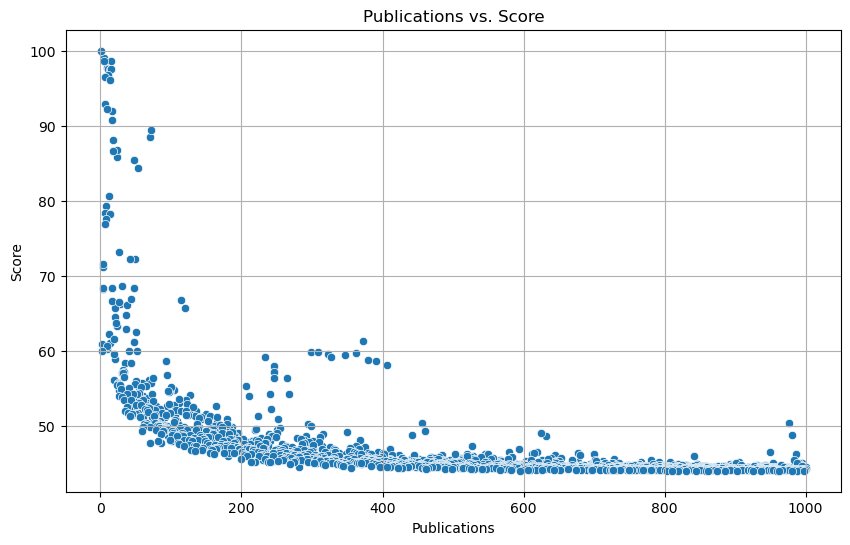

In [7]:
# Scatter plot for Publications vs. Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='publications', y='score', data=df)
plt.title('Publications vs. Score')
plt.xlabel('Publications')
plt.ylabel('Score')
plt.grid(True)
plt.show()

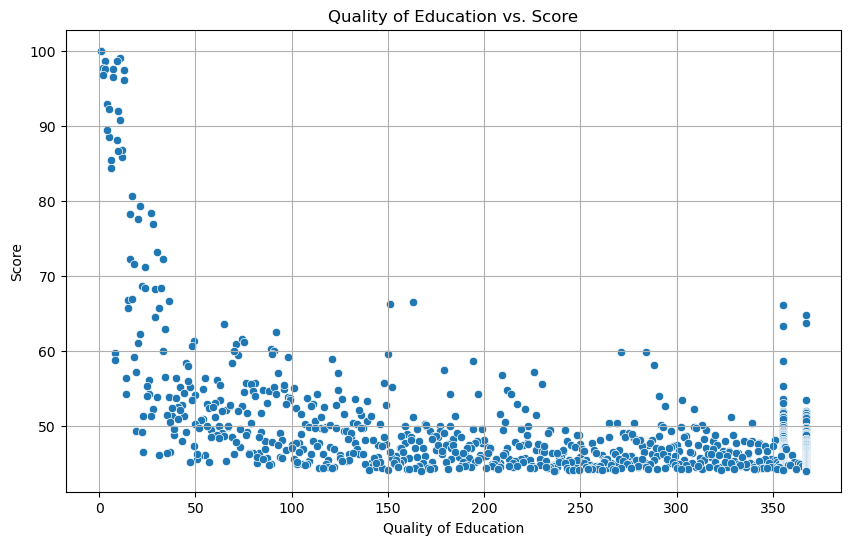

In [8]:
# Scatter plot for Quality of Education vs. Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='quality_of_education', y='score', data=df)
plt.title('Quality of Education vs. Score')
plt.xlabel('Quality of Education')
plt.ylabel('Score')
plt.grid(True)
plt.show()

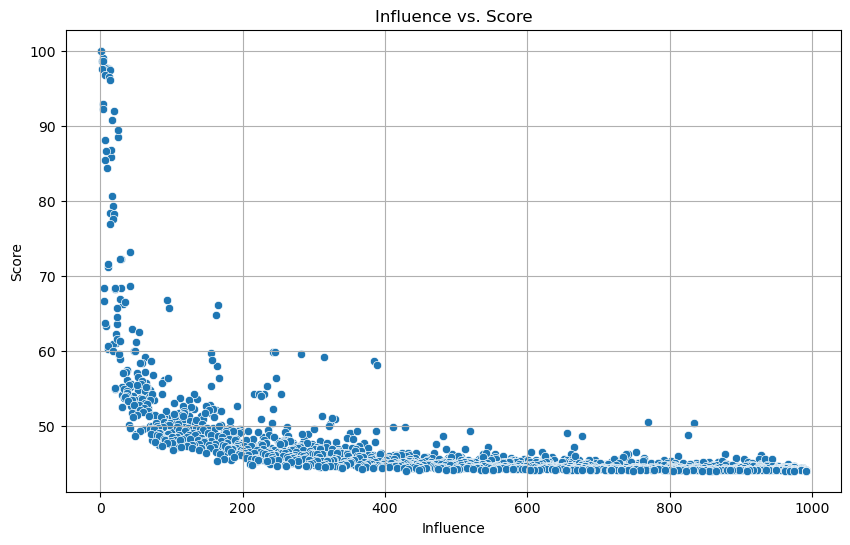

In [9]:
# Scatter plot for Influence vs. Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='influence', y='score', data=df)
plt.title('Influence vs. Score')
plt.xlabel('Influence')
plt.ylabel('Score')
plt.grid(True)
plt.show()

# Hypotheses

## Hypothesis 1
**Hypothesis:** There is a negative correlation between the number of publications and the overall score of a university.

**Rationale:** It may be that universities focusing heavily on quantity of publications might compromise on other quality aspects that affect their overall score.

## Hypothesis 2
**Hypothesis:** There is a negative correlation between the quality of education and the overall score of a university.

**Rationale:** Surprisingly, higher scores in quality of education might not always correlate with the overall score, possibly due to other dominating factors like research influence or alumni employment rates.

## Hypothesis 3
**Hypothesis:** There is a negative correlation between the influence score and the overall score of a university.

**Rationale:** Higher influence scores might not directly translate to better overall scores, potentially due to the balance of different metrics used in the ranking system.


In [10]:
# Independent variables
X_publications = df['publications'].values.reshape(-1, 1)
X_quality_of_education = df['quality_of_education'].values.reshape(-1, 1)
X_influence = df['influence'].values.reshape(-1, 1)

In [11]:
# Dependent variable
y = df['score'].values

In [12]:
# Print the shapes to verify
print(f"Shape of X_publications: {X_publications.shape}")
print(f"Shape of X_quality_of_education: {X_quality_of_education.shape}")
print(f"Shape of X_influence: {X_influence.shape}")
print(f"Shape of y: {y.shape}")

Shape of X_publications: (2000, 1)
Shape of X_quality_of_education: (2000, 1)
Shape of X_influence: (2000, 1)
Shape of y: (2000,)


In [13]:
# Splitting the data into training and test sets
X_train_pub, X_test_pub, y_train, y_test = train_test_split(X_publications, y, test_size=0.2, random_state=42)
X_train_edu, X_test_edu, _, _ = train_test_split(X_quality_of_education, y, test_size=0.2, random_state=42)
X_train_inf, X_test_inf, _, _ = train_test_split(X_influence, y, test_size=0.2, random_state=42)


In [14]:
# Checking the shapes of the resulting sets
print(f"Shape of X_train_pub: {X_train_pub.shape}")
print(f"Shape of X_test_pub: {X_test_pub.shape}")
print(f"Shape of X_train_edu: {X_train_edu.shape}")
print(f"Shape of X_test_edu: {X_test_edu.shape}")
print(f"Shape of X_train_inf: {X_train_inf.shape}")
print(f"Shape of X_test_inf: {X_test_inf.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train_pub: (1600, 1)
Shape of X_test_pub: (400, 1)
Shape of X_train_edu: (1600, 1)
Shape of X_test_edu: (400, 1)
Shape of X_train_inf: (1600, 1)
Shape of X_test_inf: (400, 1)
Shape of y_train: (1600,)
Shape of y_test: (400,)


In [15]:
# Create a linear regression model
model_pub = LinearRegression()
model_edu = LinearRegression()
model_inf = LinearRegression()


In [16]:
# Fit the model to the training data
model_pub.fit(X_train_pub, y_train)
model_edu.fit(X_train_edu, y_train)
model_inf.fit(X_train_inf, y_train)

LinearRegression()

In [17]:
# Make predictions on the test data
y_pred_pub = model_pub.predict(X_test_pub)
y_pred_edu = model_edu.predict(X_test_edu)
y_pred_inf = model_inf.predict(X_test_inf)

In [19]:
# Sort the test data for plotting purposes
sort_indices = X_test_pub.flatten().argsort()
X_test_pub_sorted = X_test_pub[sort_indices]
y_test_sorted = y_test[sort_indices]
y_pred_pub_sorted = y_pred_pub[sort_indices]

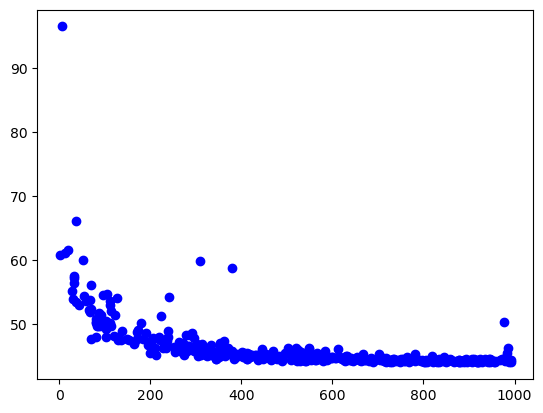

In [20]:
# Plot scatter of actual test data
plt.scatter(X_test_pub_sorted, y_test_sorted, color='blue', label='Actual')

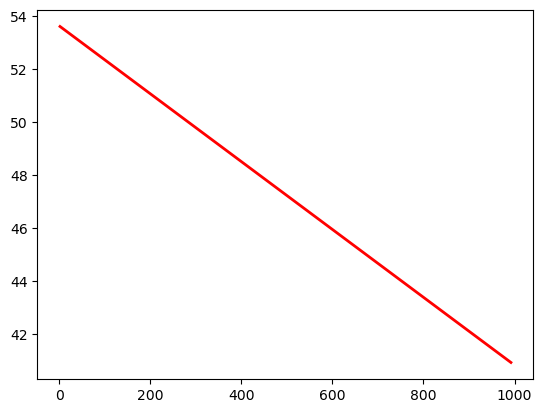

In [21]:
# Plot regression line
plt.plot(X_test_pub_sorted, y_pred_pub_sorted, color='red', linewidth=2, label='Regression Line')

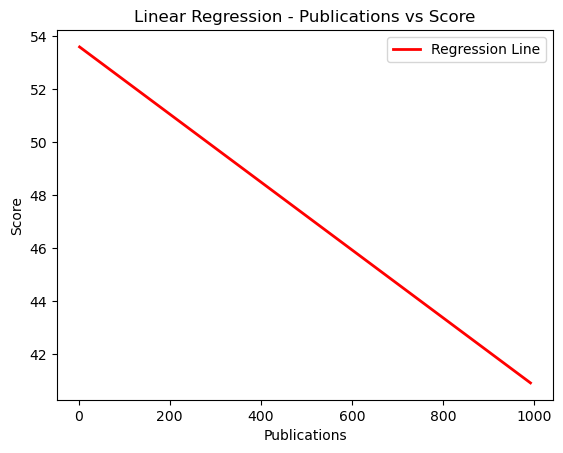

In [22]:
# Plot regression line
plt.plot(X_test_pub_sorted, y_pred_pub_sorted, color='red', linewidth=2, label='Regression Line')

# Add labels and title
plt.xlabel('Publications')
plt.ylabel('Score')
plt.title('Linear Regression - Publications vs Score')
plt.legend()

# Show plot
plt.show()

## Based on the scatter plot depicting the linear regression line against the actual data points:

The regression line appears to be a poor fit for the data. It is visibly far from the actual data points, which suggests that a linear relationship might not adequately capture the underlying pattern between the independent variable (Publications) and the dependent variable (Score). This discrepancy indicates that other factors or nonlinear relationships may be influencing the score, which are not captured by a simple linear model.

Possible reasons for the poor fit include:

The relationship between Publications and Score may not be linear; it could be quadratic, exponential, or follow some other non-linear pattern that a linear regression model cannot capture.

Outliers or influential data points might be skewing the regression line away from the majority of the data points.

Score could be influenced by multiple factors not considered in the current model, such as quality of faculty, research citations, or institutional factors.

Linear regression assumes a linear relationship between the variables, which may not hold true in this case.

To improve the model fit, it would be beneficial to:

Explore non-linear models such as polynomial regression, decision trees, or neural networks that can capture more complex relationships.

Consider feature engineering by including additional relevant features that could better explain the variability in Score.

Apply data transformations (e.g., logarithmic, exponential) to the variables to approximate linearity.

Conduct residual analysis to identify any systematic patterns that the current model does not capture.

By iteratively refining the model and exploring these possibilities, one can potentially improve the fit and gain a better understanding of the relationship between Publications and Score.

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE) and R-squared (R2) for publications model
mse_pub = mean_squared_error(y_test, y_pred_pub)
r2_pub = r2_score(y_test, y_pred_pub)
print(f"Mean Squared Error (Publications): {mse_pub:.2f}")
print(f"R-squared (Publications): {r2_pub:.2f}")

# Calculate Mean Squared Error (MSE) and R-squared (R2) for quality of education model
mse_edu = mean_squared_error(y_test, y_pred_edu)
r2_edu = r2_score(y_test, y_pred_edu)
print(f"Mean Squared Error (Quality of Education): {mse_edu:.2f}")
print(f"R-squared (Quality of Education): {r2_edu:.2f}")

# Calculate Mean Squared Error (MSE) and R-squared (R2) for influence model
mse_inf = mean_squared_error(y_test, y_pred_inf)
r2_inf = r2_score(y_test, y_pred_inf)
print(f"Mean Squared Error (Influence): {mse_inf:.2f}")
print(f"R-squared (Influence): {r2_inf:.2f}")


Mean Squared Error (Publications): 12.92
R-squared (Publications): 0.23
Mean Squared Error (Quality of Education): 14.14
R-squared (Quality of Education): 0.15
Mean Squared Error (Influence): 12.91
R-squared (Influence): 0.23


In [25]:
# Creating a DataFrame to compare predicted and actual values
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted (Publications)': y_pred_pub,
    'Predicted (Quality of Education)': y_pred_edu,
    'Predicted (Influence)': y_pred_inf
})

# Display the first few rows of the comparison DataFrame
print(comparison_df.head())

   Actual  Predicted (Publications)  Predicted (Quality of Education)  \
0   44.17                 42.399444                         44.322300   
1   45.80                 48.872613                         44.802910   
2   45.58                 51.072979                         47.726621   
3   44.39                 44.753323                         44.802910   
4   46.12                 49.729732                         44.322300   

   Predicted (Influence)  
0              44.340040  
1              47.143114  
2              50.812592  
3              46.072849  
4              49.946187  


## Model Performance Reflection

Based on the evaluation of the linear regression models on the test set, here are my reflections on their performance:

Mean Squared Error (MSE):

For Publications: 12.92
For Quality of Education: 14.14
For Influence: 12.91
The MSE values indicate the average squared difference between the predicted and actual values. Lower MSE values suggest better model performance. In this case, while the MSE values are not extremely high, they are also not very low, indicating that there is room for improvement in the models' predictive accuracy.

R-squared (R2) Score:

For Publications: 0.23
For Quality of Education: 0.15
For Influence: 0.23
The R-squared score measures the proportion of the variance in the dependent variable that is predictable from the independent variables. A higher R-squared value (closer to 1) indicates that more variance is explained by the model. The R2 scores obtained here suggest that the models explain only a moderate amount of variance in the dependent variables, indicating that they may not capture all the relevant features influencing the outcomes.

Model Fit Visualization:

When visually inspecting the scatterplots of actual versus predicted values, the points are quite spread out from the regression line, particularly for Quality of Education and Influence. This visual discrepancy suggests that the models might not adequately capture the underlying relationships in the data.

## Reflections on Data Bias

Data bias can significantly impact the performance and reliability of predictive models. Here are some reflections on potential data bias in this context:

Sample Bias: The dataset used for training and testing the models might not be representative of the entire population. If certain groups or types of data are overrepresented or underrepresented, the models may not generalize well to new data.

Feature Bias: The features (independent variables) used in the models may not comprehensively capture all factors influencing the dependent variables (such as university scores). Missing or inadequate features can lead to biased predictions.

Measurement Bias: If there are errors or inconsistencies in how data is collected or measured (e.g., quality of education or influence metrics), this can introduce bias into the models.

Historical Bias: Data collected over time may not reflect current conditions or future trends accurately, leading to biased predictions when applied to new data.